In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from src import support as sp



#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_full = pd.read_csv('../Files/full_data_clean.csv')
df_flight = pd.read_csv('../Files/flight_clean.csv')
df_loyalty = pd.read_csv('../Files/loyalty_clean.csv')


In [3]:
numerics = df_full.select_dtypes(exclude = ['O','category']).columns
categorics = df_full.select_dtypes(exclude = 'number').columns

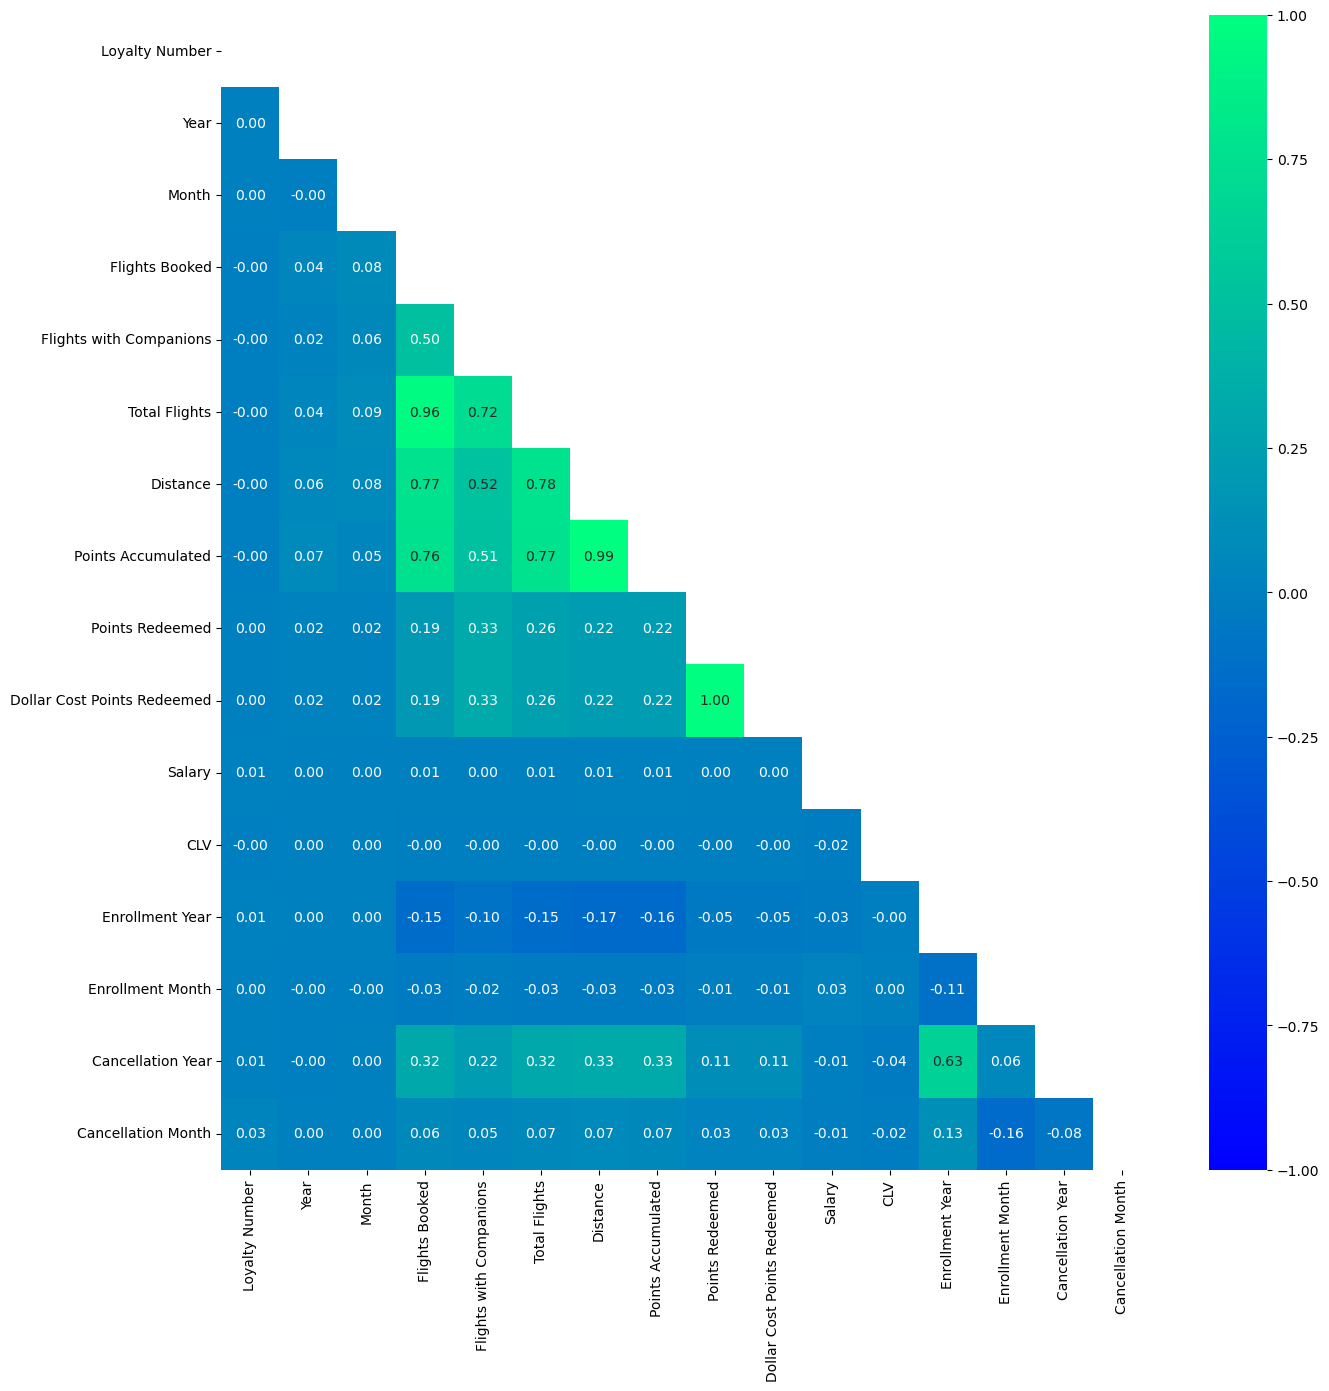

In [ ]:
df_corr = df_full[numerics].corr(method = 'pearson')

plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", # FORMAT FOR 2 DECIMALS
            cmap = "winter", # COLOR SCHEME
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


Text(0.5, 1.0, 'Enrollment Year & Cancellation Year')

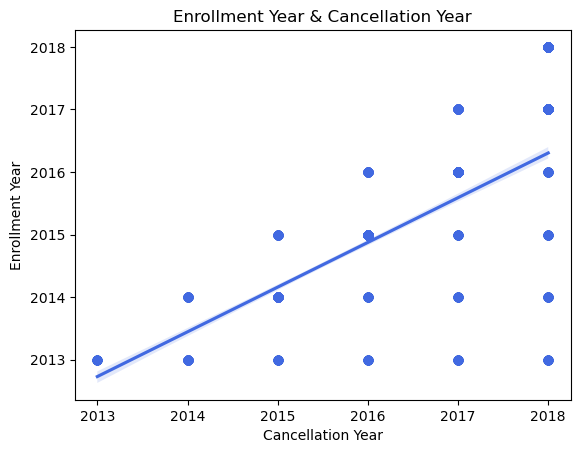

In [46]:
sns.regplot(data=df_loyalty, y='Enrollment Year', x='Cancellation Year', color = 'royalblue')
plt.title('Enrollment Year & Cancellation Year')


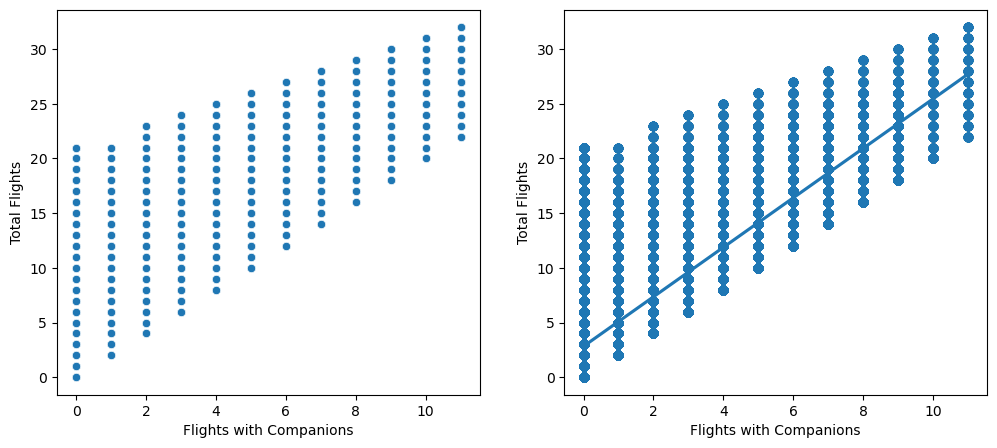

In [36]:
sp.num_and_num (df_full,'Flights with Companions', 'Total Flights')

In [ ]:
# CORRELATION MONTHLY FLIGHTS AND BOOKINGS
# Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?



In [ ]:
#sns.pairplot( data=df_loyalty)

'\nIt is notable the consistency on the amoutn of monthly flights on both years. \nIt is also understandable the increase on flights on 2018 compared to previous year'

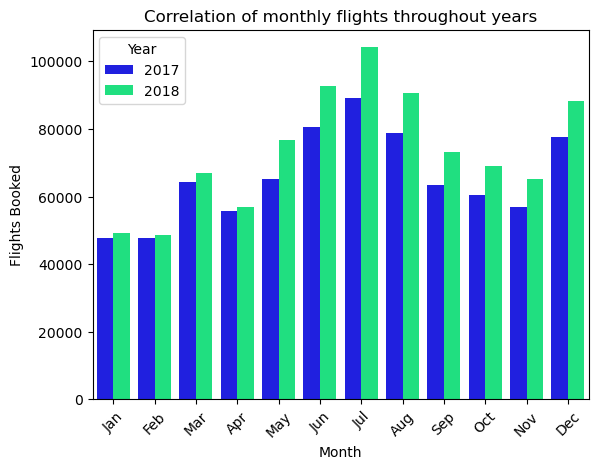

In [34]:
df_m_y = df_full.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index() # GROUP BY MONTH AND YEAR, THAN ADD BOOKED

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_m_y['Month'] = df_m_y['Month'].apply(lambda x: month_names[x - 1]) # REPLACING NUMBERS ON RANGE FOR MONTHS, PROVIDED LIST AND INDEX TO REPLACE

sns.barplot(data=df_m_y, x='Month', y='Flights Booked', hue='Year', palette='winter')
plt.xticks(rotation=45) # ROTATION TO NOT OVERLAY
plt.title('Correlation of monthly flights throughout years')

"""
It is notable the consistency on the amoutn of monthly flights on both years. 
It is also understandable the increase on flights on 2018 compared to previous year"""

'\nThere is a clear positive correlation between these variables, as both increase simultaneously. \nIt can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.\n\nThe heatmap highlights this correlation, and the graph also shows data for flights with companions.\nAnother interesting insight is that flights with companions are often associated with longer distances.\n'

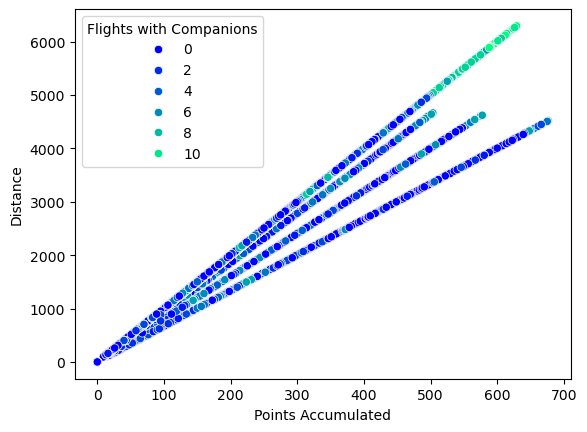

In [33]:
# CORRELATION DISTANCY AND ACCUMULATED POINTS

sns.scatterplot(data=df_full, y='Distance', x='Points Accumulated', hue='Flights with Companions', palette='winter' )

"""
There is a clear positive correlation between these variables, as both increase simultaneously. 
It can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.

The heatmap highlights this correlation, and the graph also shows data for flights with companions.
Another interesting insight is that flights with companions are often associated with longer distances.
"""

In [27]:
df_c_p

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


'\nThe grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.\nRelation that is expected considering they are the most populated provinces(external source).\n'

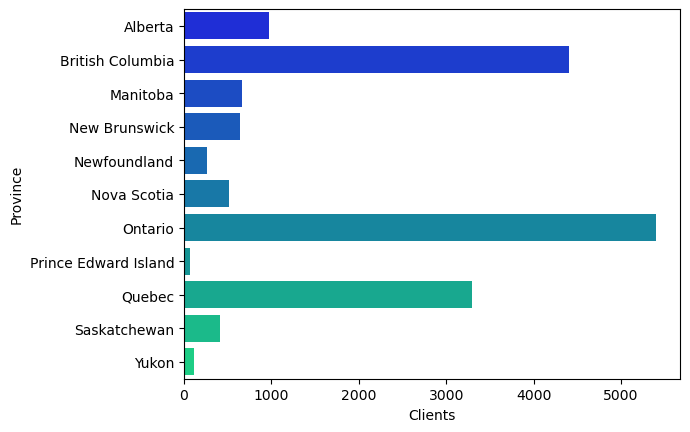

In [50]:
# CORRETATION OF CLIENTS BY PROVINCES
df_c_p = df_full.groupby('Province')['Loyalty Number'].nunique().reset_index() 
sns.barplot(data=df_c_p, y='Province', x='Loyalty Number', hue= 'Province', palette='winter')
plt.xlabel('Clients') # THE COUNTER IS BASED ON LOYALTY NUMBER, X WAS RENAMED TO BETTER REPRESENT THE DATA


"""
The grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.
Relation that is expected considering they are the most populated provinces(external source).
"""

In [71]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS/ NOT CONSIDERING NULLS

correctorder = ['Low', 'Medium', 'High']
df_full['Salary Scale'] = pd.Categorical(df_full['Salary Scale'], categories=correctorder, ordered=True) # ADDED TO CORRECT ORDER BY THE LIST, NOT ALPHABETICALY AS DEFAULT

cross_cate = pd.crosstab(df_full['Salary Scale'], df_full['Education'])
cross_cate

Education,Bachelor,Doctor,High School or Below,Master
Salary Scale,,,,
Low,252567,5738,18915,12287
Medium,0,10721,0,0
High,0,1272,0,0


'\nThere are a some interesting results on this correlation.\nFirst, you can observe that the majority of the clients have a bachelor degree and have low salary in the range.\nFollowed by a small representation of other education level in this salary range.\n\nSecond, clients with doctor degree are predominant classified as medium salary and high salary range\n\n'

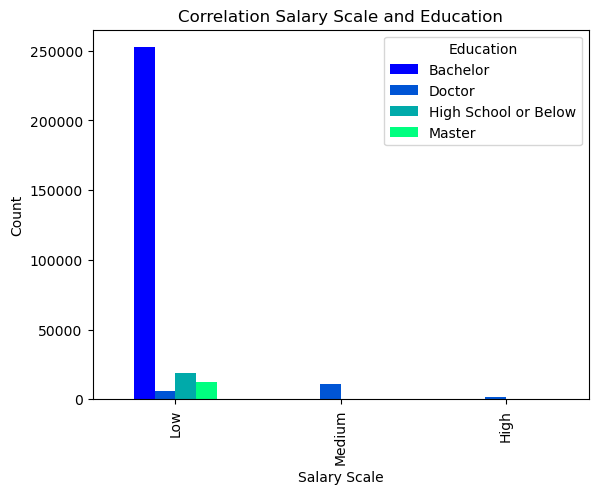

In [ ]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS
cross_cate.plot(kind='bar', stacked=False, colormap='winter', )

plt.title('Correlation Salary Scale and Education')
plt.xlabel('Salary Scale')
plt.ylabel('Count')
plt.legend(title='Education')

"""
First, you can observe that the majority of the clients have a bachelor degree and have low salary in the range.
Followed by a small representation of other education level in this salary range.

Second, clients with doctor degree are predominant classified as medium salary and high salary range

"""

In [102]:
# PROPORTION OF CLIENTS AND LOYALTY CARDS

#¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

df_lc_ln = df_full.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()

df_lc_ln


,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637
